# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  14.4M      0  0:00:06  0:00:06 --:--:-- 18.8M
total 272
-rw-r--r-- 1 root root  11095 Jun 30 14:06 history.png
-rw-r--r-- 1 root root 203963 Jun 30 13:15 image_denoised.png
drwx------ 2 root root  53248 Jun  9 13:06 paintings
drwxr-xr-x 1 root root   4096 Jun 15 13:37 sample_data


In [2]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Alfred_Sisley_22.jpg',
 './paintings/Leonardo_da_Vinci_108.jpg',
 './paintings/Rembrandt_145.jpg',
 './paintings/Pierre-Auguste_Renoir_173.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Claude_Monet_62.jpg',
 './paintings/Rembrandt_52.jpg',
 './paintings/Vincent_van_Gogh_651.jpg',
 './paintings/Francisco_Goya_234.jpg',
 './paintings/Pierre-Auguste_Renoir_274.jpg',
 './paintings/Alfred_Sisley_31.jpg',
 './paintings/Paul_Gauguin_137.jpg',
 './paintings/Albrecht_DuÌ\x88rer_208.jpg',
 './paintings/Joan_Miro_62.jpg',
 './paintings/Henri_Rousseau_8.jpg',
 './paintings/Paul_Klee_69.jpg',
 './paintings/Edouard_Manet_24.jpg',
 './paintings/Rene_Magritte_147.jpg',
 './paintings/Albrecht_DuÌ\x88rer_56.jpg',
 './paintings/Titian_146.jpg',
 './paintings/Albrecht_DuÌ\x88rer_288.jpg',
 './paintings/Francisco_Goya_278.jpg',
 './paintings/Vincent_van_Gogh_608.jpg',
 './paintings/Rene_Magritte_132.jpg',
 './paintings/Peter_Paul_Rubens_57.jpg',
 './paintings/Amedeo_Modigliani_1

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

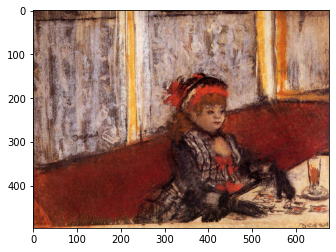

In [3]:
import matplotlib.pyplot as plt

image = plt.imread(dataset_paths[53])
plt.imshow(image)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [4]:
img_shape = image.shape

In [5]:
img_dim = img_shape[2]

❓ **What was in the image above?**

In [6]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [7]:
! pip install nbresult

In [8]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

FileNotFoundError: ignored

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [9]:
from keras_preprocessing.image import img_to_array, load_img

In [10]:
list_of_files = glob.glob("./paintings/*.jpg")
for file in list_of_files:
    img = load_img(file)
    dataset_images = img_to_array(img)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [15]:
from tqdm import tqdm
import numpy as np

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [16]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])


100%|██████████| 614/614 [00:00<00:00, 25565.38it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [17]:
# YOUR CODE HERE

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [18]:
# YOUR CODE HERE

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [19]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

NameError: ignored

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

In [20]:
# YOUR CODE HERE

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [21]:
# YOUR CODE HERE

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [22]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0  16.7M      0  0:00:17  0:00:17 --:--:-- 19.7M


### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [24]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
encoder = Sequential(name='encoder')   
encoder.add(Conv2D(8, (2,2), input_shape=(120,100,3), activation='relu'))
encoder.add(MaxPooling2D(2))
encoder.add(Conv2D(16, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))
encoder.add(Conv2D(32, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))     
encoder.add(Flatten())
encoder.add(Dense(latent_dimensions, activation='tanh'))
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 119, 99, 8)        104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 48, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 23, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0   

👉 **Test your encoder below**

In [27]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              29576712  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 29,583,387
Trainable params: 29,583,387
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [28]:
# YOUR CODE HERE

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [29]:
autoencoder.compile(loss='mse', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2, restore_best_weights=True)

In [31]:
history_denoising = autoencoder.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.3, callbacks=[es])

Epoch 1/20
19/19 [==============================] - 26s 1s/step - loss: 0.0776 - val_loss: 0.0761
Epoch 2/20
19/19 [==============================] - 25s 1s/step - loss: 0.0739 - val_loss: 0.0742
Epoch 3/20
19/19 [==============================] - 25s 1s/step - loss: 0.0725 - val_loss: 0.0729
Epoch 4/20
19/19 [==============================] - 25s 1s/step - loss: 0.0692 - val_loss: 0.0640
Epoch 5/20
19/19 [==============================] - 25s 1s/step - loss: 0.0556 - val_loss: 0.0468
Epoch 6/20
19/19 [==============================] - 25s 1s/step - loss: 0.0431 - val_loss: 0.0396
Epoch 7/20
19/19 [==============================] - 25s 1s/step - loss: 0.0366 - val_loss: 0.0348
Epoch 8/20
19/19 [==============================] - 25s 1s/step - loss: 0.0322 - val_loss: 0.0319
Epoch 9/20
19/19 [==============================] - 25s 1s/step - loss: 0.0292 - val_loss: 0.0302
Epoch 10/20
19/19 [==============================] - 25s 1s/step - loss: 0.0267 - val_loss: 0.0284
Epoch 11/20
19/19 [

❓ **Plot your training and validation loss at each epoch using the cell below**

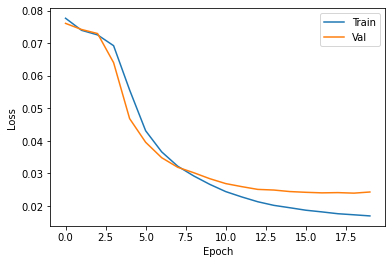

In [32]:
# Plot below your train/val loss history
def plot_training_curves(history, figsize=(12, 5)):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])

plot_training_curves(history_denoising )

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [33]:
Y_pred = autoencoder.predict(X_test, verbose=1)

7/7 [==============================] - 2s 322ms/step


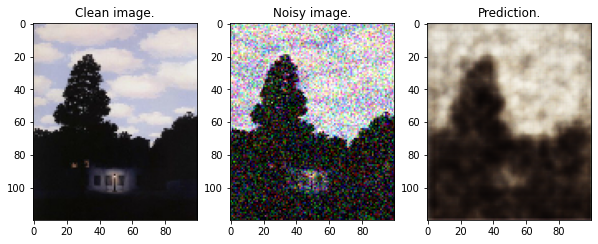

In [34]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('image_denoised.png')

🧪 **Send your results below**

In [60]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

NameError: ignored